<center>
<img src="logo.png" height="900"> 
</center>


#  Аварии на шахтах

In [1]:
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [2]:
import pandas as pd

df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

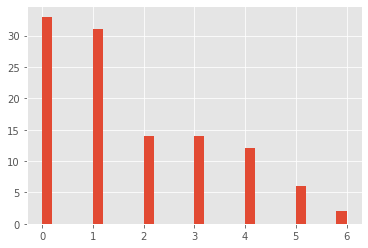

In [3]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [4]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat = df['count'].mean()       # ваша оценка метода моментов

# your code here
lam_hat

1.7053571428571428

In [5]:
# проверка, что оценка была найдена корректно 
# похожие тесты, но для lam_hat скрыты от вас
# они запустятся после того как вы сдадите тетрадку на проверку в грейдер

assert n_hat == 112 


__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [19]:
lam_se = np.sqrt(lam_hat / (n_hat))         # ваша оценка

# your code here
lam_se

0.1233953121525469

In [20]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

# несколько похожих тестов скрыты от вас


__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [22]:
alpha = 0.1
q = sts.norm.ppf(1 - alpha / 2)

left = lam_hat - q * lam_se
right = lam_hat + q * lam_se
delta = right - left

# your code here


In [23]:
left

1.502389916114217

In [24]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

# несколько похожих тестов скрыты от вас


__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [36]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']
lam_1 = x.mean()
lam_2 = y.mean()
lam_1_var = lam_1
lam_2_var = lam_2

alpha = 0.05
q = sts.norm.ppf(1 - alpha / 2)
dif_mu = lam_1 - lam_2
dif_se = np.sqrt(lam_1_var / len(x) + lam_2_var / len(y))

left = dif_mu - q * dif_se
right = dif_mu + q * dif_se
delta = right - left

# your code here


In [39]:
left, right

(1.2835473859716393, 2.3100010011251353)

In [38]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

# несколько похожих тестов скрыты от вас


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [40]:
def poiss_prob(k):
# your code here
    return (lam_hat ** k) / np.math.factorial(k) * np.exp(-lam_hat)

In [41]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5

# похожие тесты скрыты от вас


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [51]:
alpha = 0.05
q = sts.norm.ppf(1 - alpha / 2)
var = lam_se ** 2 * (np.exp(-lam_hat) - lam_hat * np.exp(-lam_hat)) ** 2

left = poiss_prob(1) - q * np.sqrt(var)
right = poiss_prob(1) + q * np.sqrt(var)
delta = right - left

# your code here


In [52]:
left

0.27887850777625484

In [53]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

# похожие тесты скрыты от вас


По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [98]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
# your code here
    q = sts.norm.ppf(1 - alpha / 2)
    lam_se = np.sqrt(lam_hat / (n_hat)) 
    if type(k) != type(1):
        left = []
        right = []
        for i in k:
            var = lam_se ** 2 * (i / (np.math.factorial(i)) * lam_hat ** (i-1) * np.exp(-lam_hat)\
                             - lam_hat ** (i) / (np.math.factorial(i)) * np.exp(-lam_hat)) ** 2

            prob = (lam_hat ** i) / np.math.factorial(i) * np.exp(-lam_hat)
            
            left.append(prob - q * np.sqrt(var))
            right.append(prob + q * np.sqrt(var))
    else:
        var = lam_se ** 2 * (k / (np.math.factorial(k)) * lam_hat ** (k-1) * np.exp(-lam_hat)\
                             - lam_hat ** (k) / (np.math.factorial(k)) * np.exp(-lam_hat)) ** 2

        prob = (lam_hat ** k) / np.math.factorial(k) * np.exp(-lam_hat)
    
        left = prob - q * np.sqrt(var)
        right = prob + q * np.sqrt(var)

    return left, right

In [99]:
prob_ci(1)

(0.26913834350933463, 0.35061395113241156)

In [100]:
prob_ci(0)

(0.12395261795736327, 0.2394623401571685)

In [101]:
left, right = prob_ci(1)
delta = right - left
print(delta)

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left
print(delta)

assert np.abs(delta - 0.11551) < 1e-5

0.08147560762307693
0.11550972219980522


Сделали функцию? Запускайте код для не очень информативной картинки!

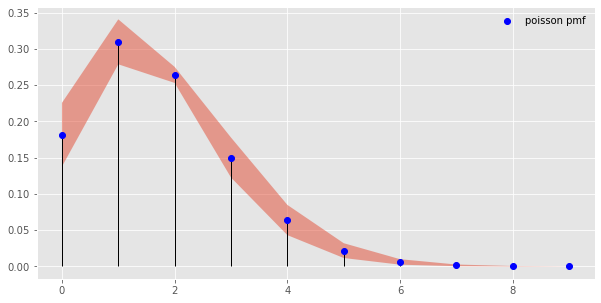

In [105]:
poiss_rv = sts.poisson(lam_hat)

x = np.arange(10)

p = poiss_rv.pmf(x)
left, right = prob_ci(x, alpha=0.05)

plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [106]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.13776 и 0.22565
Вероятность P(X=1) лежит между  0.27888 и 0.34087
Вероятность P(X=2) лежит между  0.25318 и 0.27527
Вероятность P(X=3) лежит между  0.12262 и 0.17778
Вероятность P(X=4) лежит между  0.043197 и 0.084874
Вероятность P(X=5) лежит между  0.011636 и 0.032046
Вероятность P(X=6) лежит между  0.0024269 и 0.0099886
Вероятность P(X=7) лежит между  0.00037676 и 0.0026479
Вероятность P(X=8) лежит между  3.4594e-05 и 0.00061018
Вероятность P(X=9) лежит между  -2.1082e-06 и 0.00012428


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [65]:
df['count'].mean()

1.7053571428571428

In [66]:
df['count'].var()

2.7142052767052722

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.